In [1]:
import zipfile
import os

zip_path = "/content/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/iris_data")

os.listdir("/content/iris_data")


['Iris.csv', 'database.sqlite']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv("/content/iris_data/Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape


(150, 6)

In [5]:
df = df.drop("Id", axis=1)


In [6]:
df['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [7]:
X = df.drop("Species", axis=1)
y = df["Species"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 1.0


In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 1.0


In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 1.0


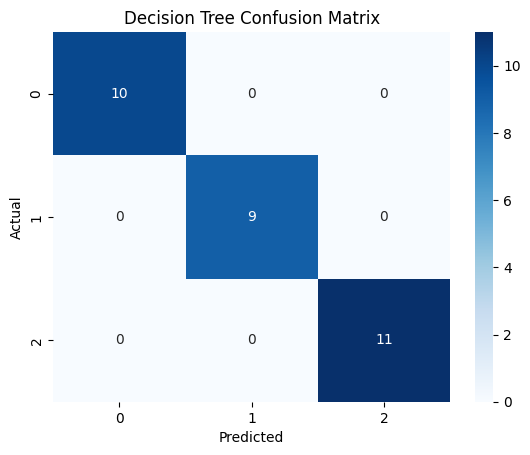

In [12]:
cm = confusion_matrix(y_test, dt_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()
